# OpenStreetMap

* **Products used:**
[OpenStreetMap](https://www.openstreetmap.org/)

*This dataset is external to the Digital Earth Africa platform.*

## Background

[OpenStreetMap](https://www.openstreetmap.org/) is a free and open geographic database, providing location information of roads, buildings, and landmarks. 
It is built, maintained and supported by a world-wide geospatial community.

OpenStreetMap data is licensed under the [Open Data Commons Open Database License (ODbL)](https://opendatacommons.org/licenses/odbl/) by the OpenStreetMap Foundation (OSMF). It is free to copy, distribute, transmit and adapt the data, providing credit to OpenStreetMap and its contributors. Full licence information and attribution guidelines can be found at the [OpenStreetMap's Copyright and License page](https://www.openstreetmap.org/copyright).

## Description

This notebook will demonstrate how to access OpenStreetMap data using Python package [`osmnx`](https://osmnx.readthedocs.io/en/stable/osmnx.html). 

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

The `osmnx` package will be installed if it's not yet available in the environment.

In [1]:
try:
    import osmnx as ox
except:
    import os
    os.system('pip install osmnx')
    import osmnx as ox

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
import geopandas as gpd

By default, `osmnx` will cache the query response so it doesn't have to call the API repeatedly for the same request.
Accessing the cache is efficient when refining an analysis or when a user's main area of interest if fixed. 
The users should, however, be aware that the cached files will take up storage space. 

Whether to use the cache and where to store the cached data can be configured.
In this example, we will set the cache to be stored in a temporary folder that is cleared when a user logs out of the Sandbox.
This may not be necessary for some users.

In [3]:
ox.settings.cache_folder='/tmp/cache/'

### Analysis parameters

This section defines the analysis parameters, including:

* `central_lat, central_lon, buffer`: center lat/lon and analysis window size for the area of interest

The default location is in Johannesburg, South Africa.

The OpenStreetMap API provides a few different ways to define location. 
While methods using address or place name are convenient to use, they depend on geocoding and are more likely to yield ambiguous location matches. 
If place name is used, the `osmnx.geocode_to_gdf()` function can be used to check whether a location name yields the correct place boundary.
For combined analysis with DEAfrica datasets, query using bounding box or polygon is preferred.

When using bounding box to query, note the order of bounds are "north, south, east, west".

In [4]:
# Set the central latitude and longitude.
central_lat = -26.2041
central_lon = 28.0473

# Set the buffer to load around the central coordinates.
buffer = 0.05

# Compute the bounding box for the study area. 
xmin, xmax = central_lon - buffer, central_lon + buffer
ymin, ymax = central_lat - buffer, central_lat + buffer

## Retrieve building geometries from OpenStreetMap

Different types of geometries can be queried by defining the `tags` parameter.
For example, `tags={'building': True}` would return all building footprints in the area. 

Using the location and tags, geometries will be retrieved from OpenStreetMap and the results are returned as a Geopandas GeoDataFrame.

In [5]:
# tags for buildings
tags = {'building': True}

In [6]:
#noting the order of the bounds provided
geometries = ox.geometries_from_bbox(ymax, ymin, xmax, xmin, tags)

In [7]:
#print the first few rows
geometries.head()

building                        name  \
element_type osmid                                                 
node         618018755        public  Langlaagte Testing Grounds   
             739768208        public  Astotech Conference Centre   
             3656191305  residential  Society of Jesus (Jesuits)   
way          24470851            yes              Melvile Corner   
             26327903            yes              Origins Centre   

                                                                  geometry  \
element_type osmid                                                           
node         618018755                          POINT (28.00625 -26.21595)   
             739768208                          POINT (28.04897 -26.17096)   
             3656191305                         POINT (28.00091 -26.18852)   
way          24470851    POLYGON ((27.99984 -26.17633, 28.00043 -26.176...   
             26327903    POLYGON ((28.02799 -26.19291, 28.02852 -26.192...   

                             addr:city addr:housenumber addr:postcode  \
element_type osmid                                                      
node         618018755             NaN              NaN           NaN   
             739768208             NaN              NaN           NaN   
             3656191305  Auckland Park               15          2092   
way          24470851              NaN              NaN           NaN   
             26327903              NaN              NaN           NaN   

                            addr:street building:levels            phone  \
element_type osmid                                                         
node         618018755              NaN             NaN              NaN   
             739768208              NaN             NaN              NaN   
             3656191305  Molesey Avenue               1  +27 11 482 4237   
way          24470851               NaN             NaN              NaN   
             26327903               NaN             NaN              NaN   

                                    website  ... contact:youtube roof:colour  \
element_type osmid                           ...                               
node         618018755                  NaN  ...             NaN         NaN   
             739768208                  NaN  ...             NaN         NaN   
             3656191305  https://sj.org.za/  ...             NaN         NaN   
way          24470851                   NaN  ...             NaN         NaN   
             26327903                   NaN  ...             NaN         NaN   

                        tower:type level  ref contact:email  \
element_type osmid                                            
node         618018755         NaN   NaN  NaN           NaN   
             739768208         NaN   NaN  NaN           NaN   
             3656191305        NaN   NaN  NaN           NaN   
way          24470851          NaN   NaN  NaN           NaN   
             26327903          NaN   NaN  NaN           NaN   

                        opening_hours:covid19 club ways type  
element_type osmid                                            
node         618018755                    NaN  NaN  NaN  NaN  
             739768208                    NaN  NaN  NaN  NaN  
             3656191305                   NaN  NaN  NaN  NaN  
way          24470851                     NaN  NaN  NaN  NaN  
             26327903                     NaN  NaN  NaN  NaN  

[5 rows x 125 columns]

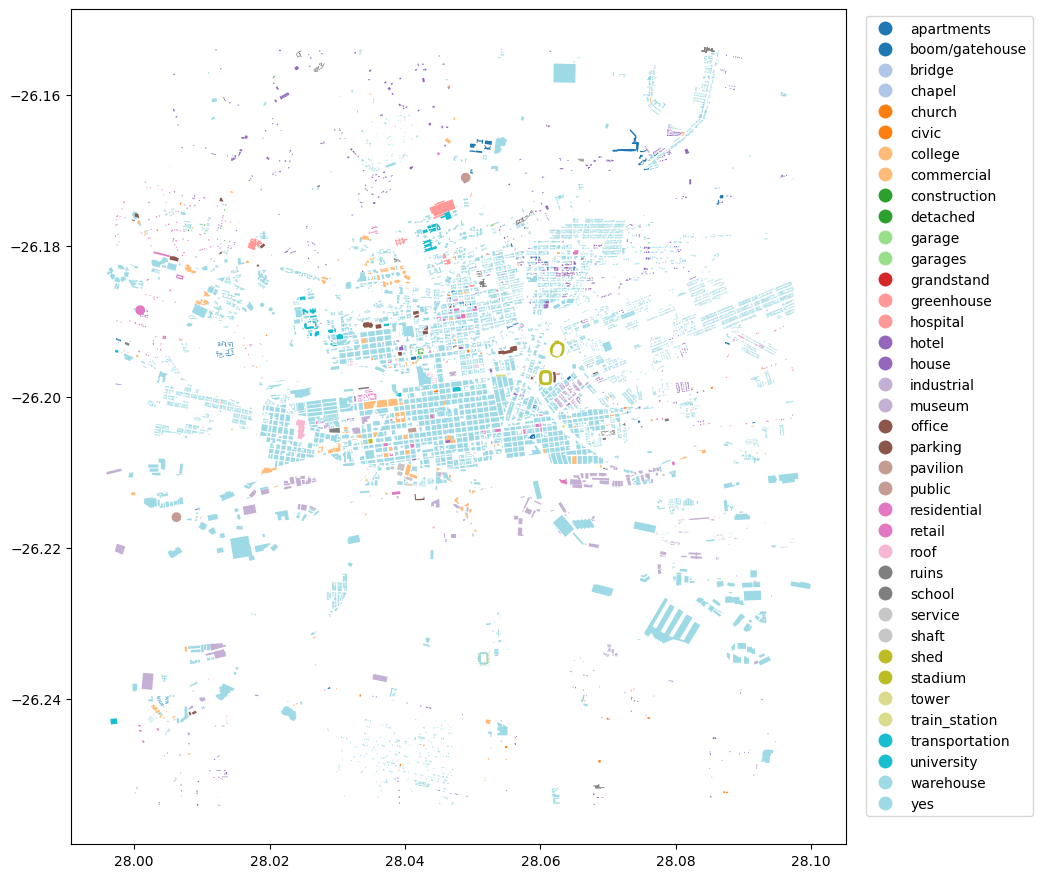

In [8]:
#visualize the geometries retrieved
geometries.plot(figsize=(10,12), cmap='tab20', column='building', legend=True, legend_kwds={'bbox_to_anchor':(1.25,1)});

## Retrieve road geometries from OpenStreetMap

Road networks can be retrieved using the `highway` tag.
A list of tag values can be used to select specific types of geometries.

Tag values for `highway` and their descriptions can be found at https://wiki.openstreetmap.org/wiki/OpenStreetMap_Carto/Lines

In [9]:
# selected types of roads
tags = {'highway': ['motorway', 'motorway_link', 'primary', 'primary_link',
                    'secondary', 'secondary_link', 'tertiary', 'tertiary_link', 
                    'residential', 'pedestrian']}

In [10]:
#noting the order of the bounds provided
geometries = ox.geometries_from_bbox(ymax, ymin, xmax, xmin, tags)

In [11]:
#print the first few rows
geometries.head()

highway  ref  \
element_type osmid                   
way          4334924  primary  R24   
             4339731  primary  R41   
             4339842  primary  R24   
             4339844  primary  R24   
             4339876  primary  R41   

                                                               geometry  \
element_type osmid                                                        
way          4334924  LINESTRING (28.05643 -26.20387, 28.05627 -26.2...   
             4339731  LINESTRING (28.01733 -26.21239, 28.01707 -26.2...   
             4339842  LINESTRING (28.08513 -26.19127, 28.08585 -26.1...   
             4339844  LINESTRING (28.05880 -26.20285, 28.05802 -26.2...   
             4339876  LINESTRING (28.01748 -26.21220, 28.01759 -26.2...   

                     junction:ref crossing                   name direction  \
element_type osmid                                                            
way          4334924          NaN      NaN    Commissioner Street       NaN   
             4339731          NaN      NaN         Main Reef Road       NaN   
             4339842          NaN      NaN       Kitchener Avenue       NaN   
             4339844          NaN      NaN  Albertina Sisulu Road       NaN   
             4339876          NaN      NaN         Main Reef Road       NaN   

                     noexit access destination:ref:to  ...  lit minspeed  \
element_type osmid                                     ...                 
way          4334924    NaN    NaN                NaN  ...  NaN      NaN   
             4339731    NaN    NaN                NaN  ...  NaN      NaN   
             4339842    NaN    NaN                NaN  ...  NaN      NaN   
             4339844    NaN    NaN                NaN  ...  NaN      NaN   
             4339876    NaN    NaN                NaN  ...  NaN      NaN   

                     maxspeed:forward cycleway:left area cycleway:right  \
element_type osmid                                                        
way          4334924              NaN           NaN  NaN            NaN   
             4339731              NaN           NaN  NaN            NaN   
             4339842              NaN           NaN  NaN            NaN   
             4339844              NaN           NaN  NaN            NaN   
             4339876              NaN           NaN  NaN            NaN   

                     maxspeed:type bus:lanes:backward covered handrail  
element_type osmid                                                      
way          4334924           NaN                NaN     NaN      NaN  
             4339731           NaN                NaN     NaN      NaN  
             4339842           NaN                NaN     NaN      NaN  
             4339844           NaN                NaN     NaN      NaN  
             4339876           NaN                NaN     NaN      NaN  

[5 rows x 70 columns]

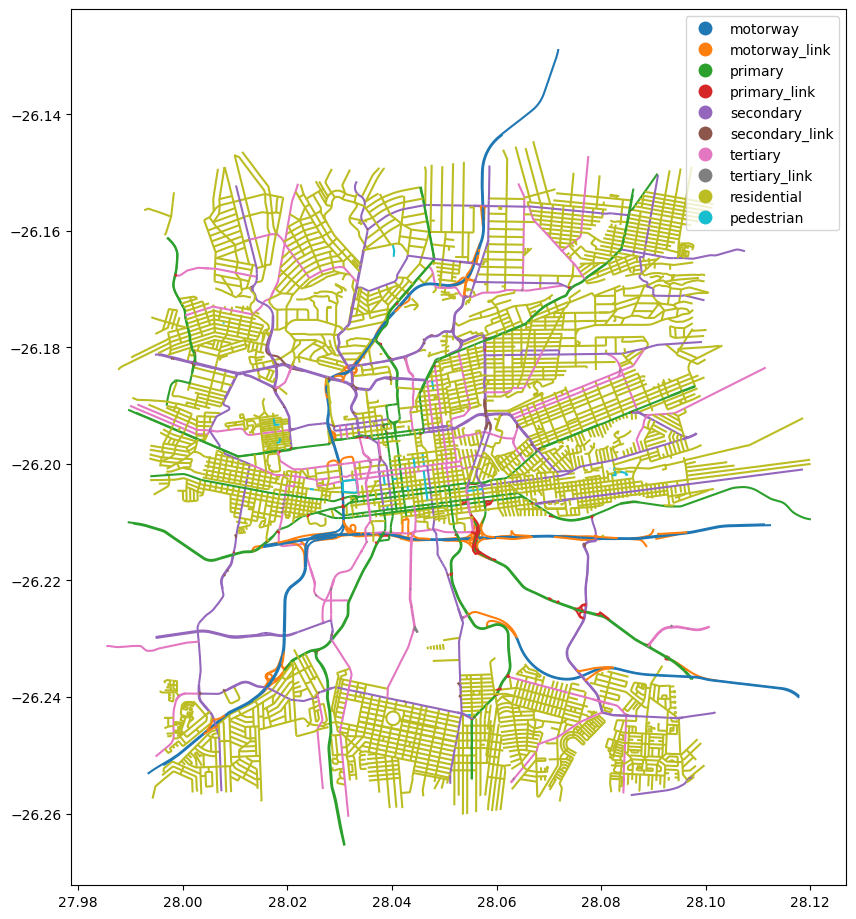

In [12]:
#visualize the geometries retrieved
geometries.plot(figsize=(10,12), cmap='tab10', column='highway', categorical=True, categories=tags['highway'], legend=True);

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

This notebook accesses OpenStreetMap data, therefore when sharing analysis results, attribution should follow guidellines from the [OpenStreetMap's Copyright and License page](https://www.openstreetmap.org/copyright).

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [13]:
import datacube
print(datacube.__version__)

1.8.8


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


**Last Tested:**

In [14]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2023-01-12'